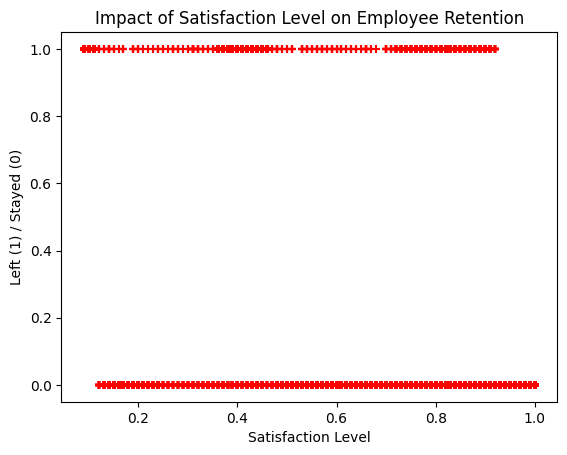

Model Accuracy: 0.7707
Predicted Probabilities:
[[0.81879598 0.18120402]
 [0.64435551 0.35564449]
 [0.67008191 0.32991809]
 ...
 [0.85026544 0.14973456]
 [0.93858587 0.06141413]
 [0.90306111 0.09693889]]
Prediction for Satisfaction Level 0.4: Stayed
Sigmoid Prediction for Satisfaction Level 0.4: 0.3644


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Load dataset
df = pd.read_csv("/content/HR_comma_sep (2).csv")

# Scatter plot: Employee satisfaction vs Retention
plt.scatter(df.satisfaction_level, df.left, marker='+', color='red')
plt.xlabel("Satisfaction Level")
plt.ylabel("Left (1) / Stayed (0)")
plt.title("Impact of Satisfaction Level on Employee Retention")
plt.show()

# Define features (X) and target (y)
X = df[['satisfaction_level']]
y = df['left']

# Split dataset (90% train, 10% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=10)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_predicted = model.predict(X_test)

# Model Accuracy
print(f"Model Accuracy: {model.score(X_test, y_test):.4f}")

# Probability predictions
print("Predicted Probabilities:")
print(model.predict_proba(X_test))

# Predict for a specific satisfaction level (e.g., 0.4)
predicted_status = model.predict([[0.4]])
print(f"Prediction for Satisfaction Level 0.4: {'Left' if predicted_status[0] == 1 else 'Stayed'}")

# Logistic function
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

# Custom prediction function
m, b = model.coef_[0][0], model.intercept_[0]
def prediction_function(satisfaction):
    z = m * satisfaction + b
    y = sigmoid(z)
    return y

satisfaction_test = 0.4
print(f"Sigmoid Prediction for Satisfaction Level {satisfaction_test}: {prediction_function(satisfaction_test):.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy of the Multinomial Logistic Regression model: 0.95


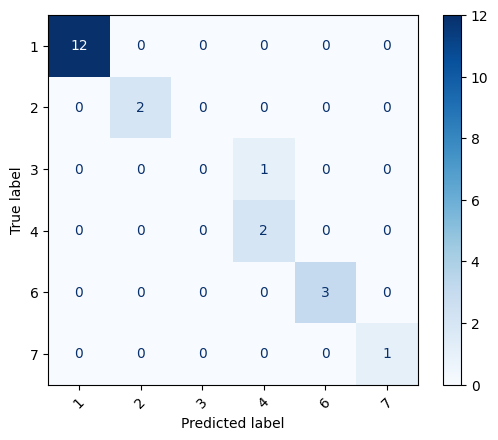

In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the Zoo dataset
file_path = "/content/zoo-data (1).csv"
zoo_data = pd.read_csv(file_path)

# Drop the 'animal_name' column as it is not a relevant feature
X = zoo_data.drop(['animal_name', 'class_type'], axis=1)  # Features
y = zoo_data['class_type']  # Target variable

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model for multi-class classification
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Multinomial Logistic Regression model: {accuracy:.2f}")

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Adjust display labels to match actual present labels in the test set
unique_classes_in_test = sorted(y_test.unique())

# Display confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=unique_classes_in_test)
cm_display.plot(cmap='Blues', xticks_rotation=45)
plt.show()
